<center><img src=https://www.toronto.ca/wp-content/uploads/2023/10/9744-Cycling-Network-graphic-2023-10-31-1024x338.png /></center>

<center><h1>City Bike Planning</h1></center>
<center>Collaborators: Ankith Bachhu, Shaunak Roy, Dominick Cardone, Daniel Lu</center>

## Table of Contents
1. [Introduction](#Introduction) <br> 
2. [Part 1: Data Collection](#Part-1:-Data-Collection) <br>
3. [Part 2: Data Cleaning & Exploratory Analysis](#Part-2:-Data-Cleaning-&-Exploratory-Analysis) <br>
4. [Part 3: Model Training and Testing](#Part-3:-Model-training-and-testing) <br>
5. [Part 4: Interpretation of Results](#Part-4:-Interpretation-of-Results) <br>
6. [Conclusion](#Conclusion) <br>
7. [References](#References)

## Introduction
The purpose of this tutorial is to walk you through the data science lifecycle, introducing you to many different data science concepts. The data science lifecycle goes as follows: 
1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

The whole purpose of the data science lifecycle is to identify trends or patterns, investigate or answer a question, or solve a problem. In this tutorial, we will be looking to build a model to help us answer the question: Why and When do people in Washington D.C use electric bikes over normal bikes? Although we will not come to an exact answer at the end of this tutorial, building a model, will help us make some conclusion, which may lead us to an answer in the future. However, it is still important to understand the underlying goal of answering this question. By answering this question, we will be able to determine factors which influence the use of electric bikes. These factors could be distance between stations, amount of time biker wants to ride, specific location in the city, etc. 

By determining these factors, we can make necessary changes to distribute our electric bikes accordingly. For example, if based on the model, we can see that people at a certain station always ride electric bikes, we can place more electric bikes in that location, while moving normal bikes to other locations. This change would be helpful, as there would be more electric bikes available at the location where it is used more, ensuring that people will have their choice of transportation. It also saves time for the company, since they do not have to ensure locations have both electric and normal bikes. By answering our question in regards to electric bikes, we can answer the same question for normal bikes, and then be able to distribute both types of bikes accordingly. 

Of course, this doesn't have to be the only question we answer, as a data scientist is always on the lookout for new observations and discoveries in their data. Throughout this tutorial, we will ask questions, in which you can also then consider if there is anything else you could've done in addition to what we provided.

**IMPORTANT** 
<br>For this tutorial, please note that an observation refers to one row of the table. In other words, one observation is one recorded bike ride.

## Part 1: Data Collection
In order to reach our end goal and answer our question at hand, we must first begin by collecting the data necessary to answer our question. It is important to find the appropriate dataset for your situation, as later on, your machine learning model is as good as the data you feed into it. And since your machine learning model is the tool that will be used to find the answer to your question, then essentially your answer is reliant on the dataset you use. Therefore, it is important to collect the appropriate dataset.

Usually, a company may have to conduct their own experiments or studies to collect the necessary data they need. However, oftentimes, these tasks are already done by other companies, and avaialble to use for the public. For our tutorial, we will be using a dataset provided by Capital Bike Share.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Quantitative-data-collection-methods-1-700x545.png"></center>

### Import Python Libraries
To begin this tutorial, we first need to import the necessary Python libraries (as shown below), which will be used for this tutorial. You should use Jupyter Notebook, as most of the code provided is run in Jupyter Notebook. Jupyter Notebook is also widely used by data scientists, as it allows us to better visualize our data and other analysis. We will dive more in detail about the use of each of these libraries as we encounter and use each one.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Download and import the data
Navigate to https://s3.amazonaws.com/capitalbikeshare-data/index.html and download any of the zip files. Extract the csv file from the zip file, and **make sure you move it to the same folder** as the one in which you are running your python program or Jupyter Notebook. For the purpose of this tutorial, it would be helpful to download the same zip file we did, if you want to compare your results with the tutorial's.

In [2]:
# Read in the csv file
df = pd.read_csv(r"202402-capitalbikeshare-tripdata.csv")

### Understanding your Data
If you downloaded the same csv file, run the code below, and compare your results, it should be the same. Before, you can move onto the next process, you need to have some understanding of the data below. Take some time to look over it, and note that each row (or observation) is recorded information for one bike ride.

In [3]:
# Print out the head of the table imported
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2/6/24 17:15,2/6/24 17:30,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2/26/24 13:19,2/26/24 13:30,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2/2/24 11:01,2/2/24 11:05,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2/25/24 8:28,2/25/24 8:48,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Part 2: Data Cleaning & Exploratory Data Analysis
Now that we have our data, the next step is to clean our data. *What does it mean to clean our data?* It is exactly how it sounds, we will need to make changes to our data in order to make it ready to be processed by our machine learning model or just easier for us to analyze. This process may involve many different things, some examples are:
* Deleting unnecessary data
* Filling in missing data
* Changing the values or metrics/measurements of our data
* Calculating new data point from existing data

Now, you may have noticed we combined two steps of the data science lifecycle: Data cleaning & Exploratory Analysis. We've combined these two steps, because sometimes it is helpful to perform exploratory analysis on our dataset, in order to help determine what things we need to clean. For example, we may plot a graph of two data points, in order to see if there any noticeable trends, which may prompt us to create a new data point, that we may believe to be useful for the machine learning model to use.

In simple terms, exploratory analysis, is performing any sort of analysis on your dataset before we pass it into the machine learning model. This process may involve creating graphs or plotting values of a certain data point. Essentially, we may be trying to answer the question before passing it into the machine learning model, making any predictions or identifying any trends, which may prove useful in interpreting our results later on after the machine learning model. This analysis may also help guide our question or research, as mentioned earlier, where we may notice one data point is significant in some sort of way.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/data-collection-methods-700x545.png"></center>

First let's list out some information about each column (aka our data points). This step will help us see if there are any data types which we may need to change for the purpose of being able to calculate additonal data points and be used in our machine learning model.

In [4]:
# List out information about each of the entries of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             318688 non-null  object 
 1   rideable_type       318688 non-null  object 
 2   started_at          318688 non-null  object 
 3   ended_at            318688 non-null  object 
 4   start_station_name  270637 non-null  object 
 5   start_station_id    270637 non-null  float64
 6   end_station_name    267827 non-null  object 
 7   end_station_id      267824 non-null  float64
 8   start_lat           318688 non-null  float64
 9   start_lng           318688 non-null  float64
 10  end_lat             318444 non-null  float64
 11  end_lng             318444 non-null  float64
 12  member_casual       318688 non-null  object 
dtypes: float64(6), object(7)
memory usage: 31.6+ MB


### Drop Some Unnecessary Data
Next, let's drop some unnecessary data. *How did we determine that this data was unnecessary?* We dropped the IDs because they are random and essentially function the same as indexes, providing no meaningful information.

In [5]:
# Drop start and end station id columns
df.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

# Drop ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [6]:
# List out unique bike types
df["rideable_type"].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

Let's drop some of the observations which are missing entries or data points. This step is important, as having observations with missing data points may lead to errors when running code later. It also doesn't make sense to incldue them, since if our machine learning model relies on data points to make predictions, if a datapoint has no value, it could interefere or screw with our predictions. Our dataset is large enough and the amount of missing data is small enough that we can safely ignore it without hindering out predictions.

In [7]:
# Drop any observations, where there are missing entries or data points
df.dropna(axis=0, inplace=True)

In [8]:
# List out info of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246639 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       246639 non-null  object 
 1   started_at          246639 non-null  object 
 2   ended_at            246639 non-null  object 
 3   start_station_name  246639 non-null  object 
 4   end_station_name    246639 non-null  object 
 5   start_lat           246639 non-null  float64
 6   start_lng           246639 non-null  float64
 7   end_lat             246639 non-null  float64
 8   end_lng             246639 non-null  float64
 9   member_casual       246639 non-null  object 
dtypes: float64(4), object(6)
memory usage: 20.7+ MB


In [9]:
# Print out table again to check it
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
16,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
17,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
18,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
19,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


This step is more specific for pandas Dataframe, but nonetheless important. It resets our indices to be in order from 0,1,..., some integer. As we can see above, the indices are scattered, skipping from 0 to 16. These indices may prevent us from performing other data cleaning later on, as well as causing potential errors.

In [10]:
# Reset indices of table and print out table again to check it
df.reset_index(drop=True, inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Next, let's convert the data types of our data points. Specifically in this case, we are converting our strings to be datetime objects, as converting it to datetime objects will allow us to perform necessary operations or arithmetic later.

In [11]:
# Convert datatypes to datetime objects
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 18.8+ MB


In [12]:
# Print out top of table to check
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Let's perform some arithemtic with our datetime objects we converted earlier. We are subtracting the start and end times, in order to calculate a new data point, which is the duration of the bike ride. We then need to convert it into total number of minutes.

In [13]:
# Create new column and data point time duration
df["time_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

# Print out top of table to check again
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member,9.0
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member,13.0
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member,30.0
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member,13.0
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual,12.0


In [14]:
# List out column infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
 10  time_duration       246639 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 20.7+ MB


### Some Exploratory Analysis #1
Let's conduct some exploratory analysis by creating a countplot for the type of bike: electric or regular. Since we're using the type of bike ridden in a trip as our dependent variable, we want to check for any skew in the frequency of each class. If there is a significant imbalance in classes, we would take a subsample of the excess class to match the number of the smaller class.

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

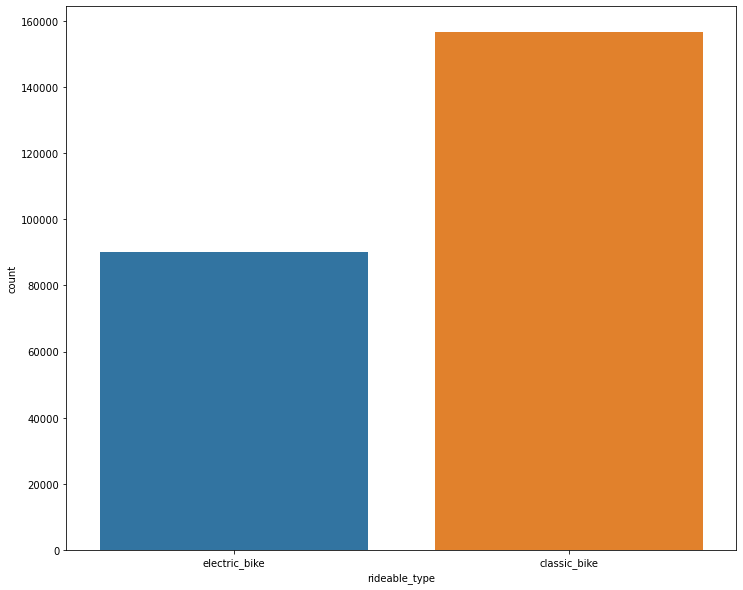

In [15]:
# Create a countplot for the type of bikes
plt.figure(figsize=(12,10))
sns.countplot(df["rideable_type"])

In this case the balance between classic bike and electric bike is around 2:1 (slightly imbalanced resample)

In [16]:
df["rideable_type"].value_counts()

classic_bike     156535
electric_bike     90104
Name: rideable_type, dtype: int64

In [21]:
electric_bike_sample = df[df["rideable_type"] == "electric_bike"]
classic_bike_sample = df[df["rideable_type"] == "classic_bike"].sample(n=len(electric_bike_sample), random_state=42)

# Concatenate the electric bike sample and the sampled classic bikes to create the balanced DataFrame
balanced_df = pd.concat([electric_bike_sample, classic_bike_sample])

In [22]:
balanced_df["rideable_type"].value_counts()

electric_bike    90104
classic_bike     90104
Name: rideable_type, dtype: int64

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

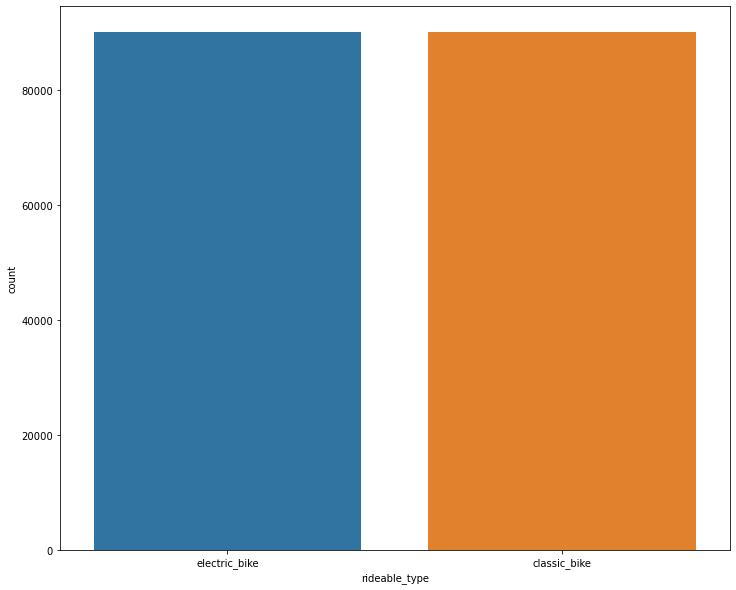

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(balanced_df["rideable_type"])

In [24]:
df = balanced_df

### One Hot Encoding
One-hot encoding is an essential technique for data scientists, used to convert multiclass categorical data into integer representations. For binary classification, we typically represent one class as 0 and the other as 1. However, for multiclass scenarios, we break the data into multiple columns, each representing a class. Importantly, we only need \( n-1 \) columns for \( n \) classes. This is because if all the other columns are 0, we can infer that the remaining class must be 1. Essentially, one class is dependent on the others.

Many people might initially think that we can simply use 1 for one class, 2 for the next class, 3 for the following class, and so on. However, this approach can bias our machine learning algorithms, as it may inadvertently assign more importance to higher numerical values. Instead, we use one-hot encoding to avoid this issue. For example, with four classes, one-hot encoding would represent them as (1,0,0,0), (0,1,0,0), (0,0,1,0), and (0,0,0,1). This way, each class is treated equally, and no unintended hierarchical relationship is introduced. We can drop one of the columns listed to reduce the number of features.

In [25]:
# Create one hot encodings for the rideable_type and member_casual
df = pd.get_dummies(df, columns=['rideable_type', 'member_casual'], drop_first=True)

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1
7,2024-02-28 11:54:00,2024-02-28 12:01:00,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,7.0,1,0
9,2024-02-25 15:56:00,2024-02-25 16:03:00,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,7.0,1,1
12,2024-02-09 23:51:00,2024-02-10 00:05:00,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898505,-77.052997,38.880440,-77.025236,14.0,1,0


Let's perform some arithmetic using some of the data we already have. More specifically, we are calculating a new data point, the distance for each ride. In order to accomplish this task, we are using the Haversine Distance formula, which allows us to calculate the distacne between two ponts given their latitude and longitude coordinates. This is really helpful in the real world, as we live on a spherical ball.

In [26]:
# Create function for Haversine Distance formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points given their latitude and longitude coordinates.
    """
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

In [27]:
# Create new distance column calculating the haversine distance for each observation
df['distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546
7,2024-02-28 11:54:00,2024-02-28 12:01:00,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,7.0,1,0,2.485127
9,2024-02-25 15:56:00,2024-02-25 16:03:00,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,7.0,1,1,1.776064
12,2024-02-09 23:51:00,2024-02-10 00:05:00,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898505,-77.052997,38.880440,-77.025236,14.0,1,0,3.131704


In [28]:
# Print out number of unique start stations
df["start_station_name"].nunique()

758

In [29]:
# Print out count for each station name
df["start_station_name"].value_counts()

Columbus Circle / Union Station                        2573
New Hampshire Ave & T St NW                            2127
15th & P St NW                                         1813
Eastern Market Metro / Pennsylvania Ave & 8th St SE    1601
5th & K St NW                                          1592
                                                       ... 
Layton Hall Dr & University Dr                            1
Green Range Dr and Glade Dr                               1
Westbranch Dr & Maitland St                               1
Ridge Rd & Southern Ave SE                                1
Becontree Ln & Goldenrain Ct                              1
Name: start_station_name, Length: 758, dtype: int64

Let's calculate another new data point. In this case, we are calculating average speed, *how could this be useful?*. We believe this may be another metric which could give us valuable insight for our data.

In [30]:
# Calculate the time duration of the trip in minutes
df["time_duration"] = (df["ended_at"] - df["started_at"]).astype('timedelta64[m]')

In [31]:
# Calculate new column average speed
df["average_speed"] = df["distance_km"] / df["time_duration"] * 60

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
7,2024-02-28 11:54:00,2024-02-28 12:01:00,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,7.0,1,0,2.485127,21.301085
9,2024-02-25 15:56:00,2024-02-25 16:03:00,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,7.0,1,1,1.776064,15.223408
12,2024-02-09 23:51:00,2024-02-10 00:05:00,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898505,-77.052997,38.880440,-77.025236,14.0,1,0,3.131704,13.421590


In [32]:
# Print out count for different values of time duration
df["time_duration"].value_counts()

5.0       13629
6.0       13570
7.0       13075
4.0       12545
8.0       12323
          ...  
220.0         1
952.0         1
1065.0        1
1170.0        1
1034.0        1
Name: time_duration, Length: 392, dtype: int64

### Some Exploratory Analysis #2
Now, let's perform some exploratory analysis. We are trying to see the frequency of observations, which fall within the variety of time durations. Notice, that we used a histogram. A histogram is useful in identifying any outliers in our data, as it shows the distribution of our data (how it differs according to a variable). As we can see from the graph, we know that a large majority of the data points lie below 200 minutes. Therefore, we have the choice of removing any data points above 200 minutes, as they may be outliers.

(array([1.79757e+05, 3.16000e+02, 3.10000e+01, 1.50000e+01, 1.20000e+01,
        1.60000e+01, 1.80000e+01, 1.80000e+01, 1.50000e+01, 1.00000e+01]),
 array([   0. ,  149.6,  299.2,  448.8,  598.4,  748. ,  897.6, 1047.2,
        1196.8, 1346.4, 1496. ]),
 <BarContainer object of 10 artists>)

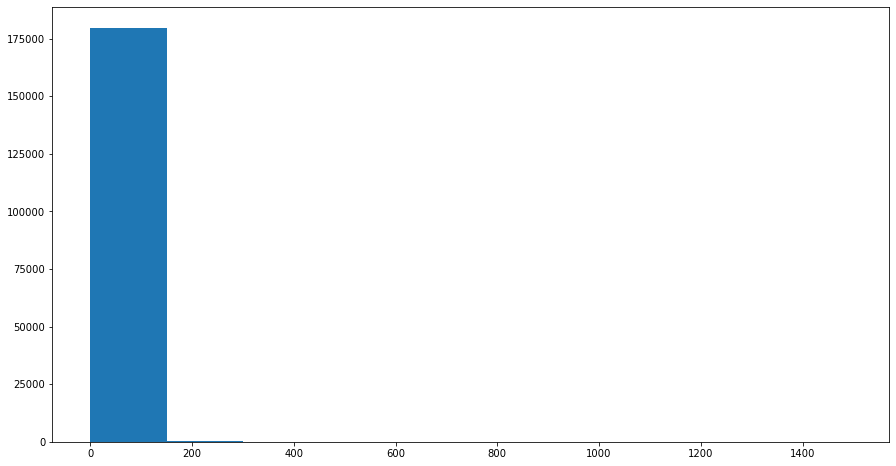

In [33]:
# Plot a histogram of time duration
plt.figure(figsize=(15,8))
plt.hist(df["time_duration"])

In [34]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180208 entries, 0 to 31740
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   180208 non-null  datetime64[ns]
 1   ended_at                     180208 non-null  datetime64[ns]
 2   start_station_name           180208 non-null  object        
 3   end_station_name             180208 non-null  object        
 4   start_lat                    180208 non-null  float64       
 5   start_lng                    180208 non-null  float64       
 6   end_lat                      180208 non-null  float64       
 7   end_lng                      180208 non-null  float64       
 8   time_duration                180208 non-null  float64       
 9   rideable_type_electric_bike  180208 non-null  uint8         
 10  member_casual_member         180208 non-null  uint8         
 11  distance_km                

Next, let's drop some unreasonable data points. In this code, we'll drop any time durations equal to 0 minutes, as such a bike ride was not a complete trip. *What might this do to our data?*

In [35]:
# Drop time durations under 0 minutes, too short
df.drop(df[df["time_duration"] <= 0].index, axis = 0, inplace=True)

# Print top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
7,2024-02-28 11:54:00,2024-02-28 12:01:00,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,7.0,1,0,2.485127,21.301085
9,2024-02-25 15:56:00,2024-02-25 16:03:00,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,7.0,1,1,1.776064,15.223408
12,2024-02-09 23:51:00,2024-02-10 00:05:00,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898505,-77.052997,38.880440,-77.025236,14.0,1,0,3.131704,13.421590


In [36]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178998 entries, 0 to 31740
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   178998 non-null  datetime64[ns]
 1   ended_at                     178998 non-null  datetime64[ns]
 2   start_station_name           178998 non-null  object        
 3   end_station_name             178998 non-null  object        
 4   start_lat                    178998 non-null  float64       
 5   start_lng                    178998 non-null  float64       
 6   end_lat                      178998 non-null  float64       
 7   end_lng                      178998 non-null  float64       
 8   time_duration                178998 non-null  float64       
 9   rideable_type_electric_bike  178998 non-null  uint8         
 10  member_casual_member         178998 non-null  uint8         
 11  distance_km                

### Some Exploratory Analysis #3
Let's perform some more exploratory analysis. From outputting our data table early on, did you notice some peculiar data points, specifically for our 'time duration' and 'average speed' data points? 

Some of the values seemed a little too unrealistic, for example, a person was riding for a total of 1400 minutes, which is about 24 hours??? On the other hand for average speed, some people were traveling at 250 km/hr???

Sometimes, unrealistic data points may have been a result of an error or mistake in the data collection phase. Therefore, it is important to identify these points, and eliminate any points, which may seem incorrect. The graph below serves to compare these potential outliers, and identify any other ones. Since we our average speed was calculated based on time duration, we plot these two variables, in order to ensure the relationship between them makes sense. *What do you notice about the graph below?*

Text(0, 0.5, 'Average Speed')

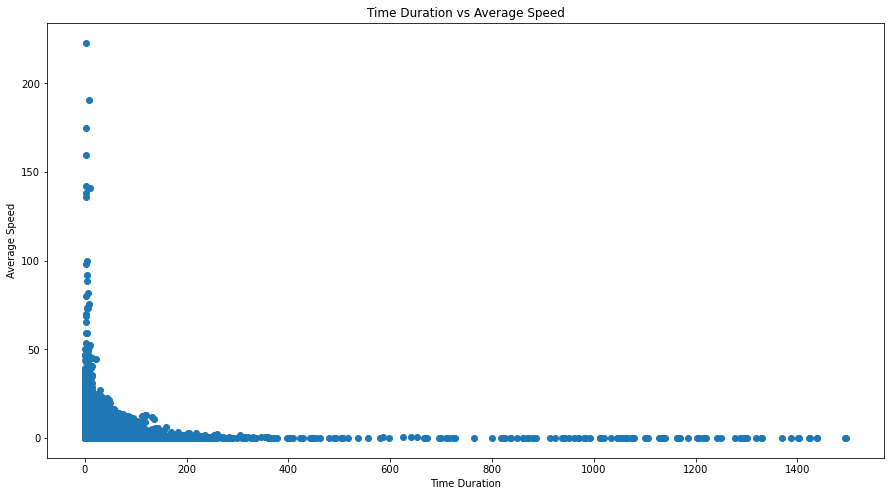

In [37]:
# Create scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(df["time_duration"], df["average_speed"])
plt.title("Time Duration vs Average Speed")
plt.xlabel("Time Duration")
plt.ylabel("Average Speed")

In [38]:
# print the median average speed
df['average_speed'].median()

10.876443763690371

After examining the graph, do you notice anything noteworthy? If you look closely, you'll see that most of the average speeds are below approximately 35 km/hr, with a median of 10 km/hr. This suggests that 35 km/hr is a good upper threshold for valid data. Therefore, let's include only the data points with speeds below this threshold. Additionally, let's sort our observations by these values to easily identify the minimum and maximum average speeds.

Note: We are creating a new dataframe so that we don't change any of the values in our original dataframe.

In [39]:
# Keep observations with average speed below 35, and sort them
filtered_df = df[df['average_speed'] <= 35].sort_values(by='average_speed')

# Print out top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
45051,2024-02-07 19:41:00,2024-02-07 19:42:00,Crystal Dr & 20th St S,Crystal Dr & 20th St S,38.856425,-77.049232,38.856425,-77.049232,1.0,0,1,0.0,0.0
29458,2024-02-25 16:03:00,2024-02-25 18:55:00,Veterans Pl & Pershing Dr,Veterans Pl & Pershing Dr,38.997445,-77.023894,38.997445,-77.023894,172.0,0,1,0.0,0.0
58896,2024-02-02 01:14:00,2024-02-02 01:15:00,21st St & Pennsylvania Ave NW,21st St & Pennsylvania Ave NW,38.901539,-77.046564,38.901539,-77.046564,1.0,0,0,0.0,0.0
244568,2024-02-21 15:20:00,2024-02-21 15:23:00,24th & N St NW,24th & N St NW,38.906600,-77.051520,38.906600,-77.051520,3.0,0,0,0.0,0.0
68774,2024-02-18 15:09:00,2024-02-18 17:50:00,34th & Water St NW,34th & Water St NW,38.903731,-77.067528,38.903731,-77.067528,161.0,0,0,0.0,0.0


Now, we will eliminate some more data points, in which seem unreaasonable. First, let's get rid of any bike rides where the start and end destination were the exact same. It is most likely these individuals barely moved, therefore, leading to inaccurate data. 

In [40]:
# Drop same start and end stations
filtered_df.drop(filtered_df[filtered_df["start_station_name"] == filtered_df["end_station_name"]].index, inplace=True)

Now, let's drop data points, where an individual was traveling below 0.2 km, as this only 200 meters. Some of the fastest people in the world run this distance in less than 20 seconds. Therefore, this bike ride would be incredibly short.

In [41]:
# Drop observations with distance under 0.2 km
filtered_df.drop(filtered_df[filtered_df["distance_km"] <= .2].index, inplace=True)

Now, let's drop data points, where the time spent riding the bike was greater than 300 minutes. Sometimes, data scientists will eliminate data points based on personal intuition, rather than relying on research. It is usually safer to rely on research or logic to back up your actions. However, for the purpose of this tutorial, we can agree that riding on a bike for more than 5 hours may be too long/unreasonable.

In [42]:
# Drop time durations longer than 300 minutes
filtered_df.drop(filtered_df[filtered_df["time_duration"] >= 300].index, inplace=True)

In [43]:
# print the filtered df after modifications
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
154530,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025
144167,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782
5045,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179
89191,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494
18312,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489


### Some Exploratory Analysis #4
Let's perform some more exploratory analysis. Let's plot the distance traveled vs the average speed. *Why do you think we are doing this?* 
**THEN PROVIDE SOME REASON**

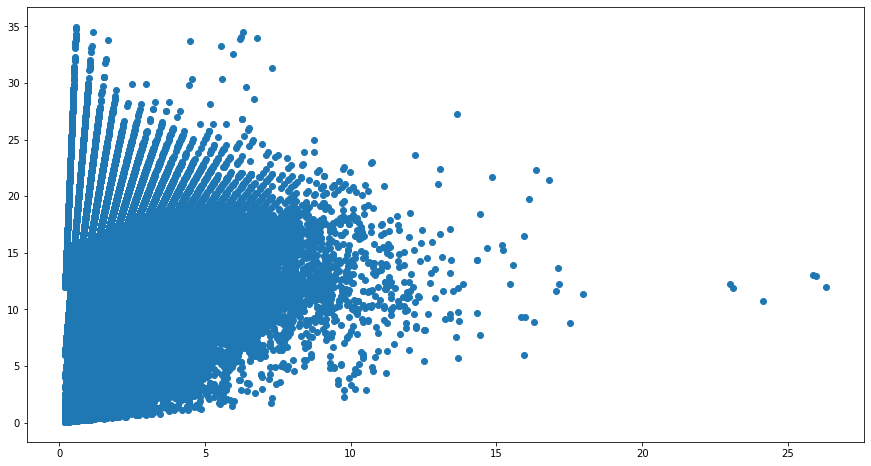

In [44]:
# Create scatter plot for average speed vs distance
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["distance_km"], filtered_df["average_speed"])

### Some Exploratory Analysis #5
Let's perform some more exploratory analysis. This time, let's do something similar, but instead plot the time duration vs the average speed. *Why do you think we are doing this?* 
**THEN PROVIDE SOME REASON**

Text(0.5, 1.0, 'time duration vs average speed')

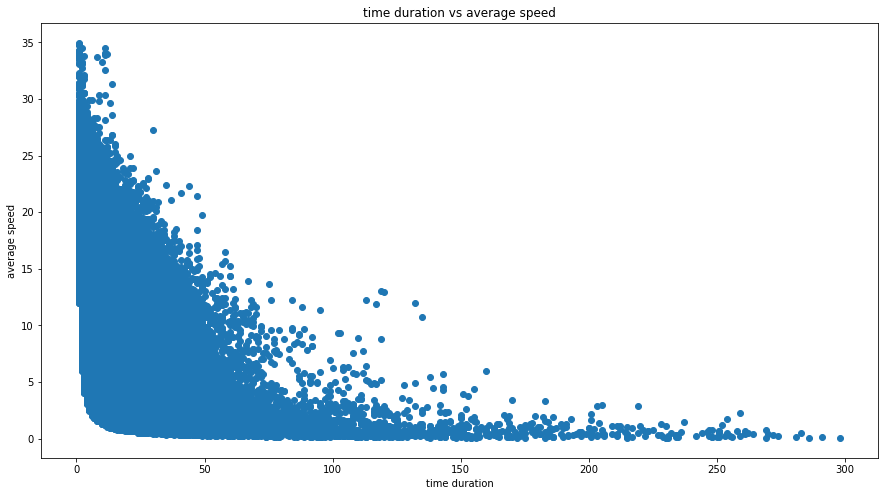

In [45]:
# Plot scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["time_duration"], filtered_df["average_speed"])
plt.xlabel("time duration")
plt.ylabel("average speed")
plt.title("time duration vs average speed")

Let's sort the values of our distance traveled to once again better view the minimum and maxiumum value of our distance traveled data point. 

In [46]:
# Sort observations by distances
filtered_df.sort_values(by='distance_km')

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
208772,2024-02-10 07:11:00,2024-02-10 07:13:00,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.0,1,0,0.200084,6.002520
12797,2024-02-29 12:48:00,2024-02-29 14:23:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,95.0,0,0,0.200238,0.126466
97494,2024-02-27 18:33:00,2024-02-27 18:35:00,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,2.0,0,1,0.200238,6.007141
142630,2024-02-05 20:27:00,2024-02-05 20:28:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
142631,2024-02-05 20:24:00,2024-02-05 20:25:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89873,2024-02-18 15:02:00,2024-02-18 16:59:00,Wiehle-Reston Metro South,N Pershing Dr & N Wayne St,38.946638,-77.339438,38.880705,-77.085960,117.0,1,1,23.123921,11.858421
67637,2024-02-04 09:55:00,2024-02-04 12:10:00,S Four Mile Run Dr & Walter Reed Dr,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,38.847360,-77.095431,38.951443,-77.340377,135.0,0,1,24.150733,10.733659
121869,2024-02-03 09:58:00,2024-02-03 11:57:00,Reston Town Center Metro North,34th & Water St NW,38.953618,-77.359698,38.903731,-77.067528,119.0,1,0,25.874759,13.046097
19418,2024-02-24 07:15:00,2024-02-24 09:15:00,North Shore & Cameron Crescent Dr/Crescent Apa...,Harvard St & Adams Mill Rd NW,38.970145,-77.338663,38.927872,-77.043358,120.0,1,0,25.966048,12.983024


### Checking Data
We will try and determine if these values seem reasonable now, ensuring that we removed the sensor/data misinformation.

In [47]:
# Calculate median of time duration data points
filtered_df["time_duration"].median()

9.0

In [48]:
# Reset indices
filtered_df.reset_index(drop=True, inplace=True)

In [49]:
# Sort the distances, and print out first 50
filtered_df["distance_km"].sort_values()[:50]

16215     0.200084
32        0.200238
16241     0.200238
102526    0.200238
102528    0.200238
102527    0.200238
16334     0.200692
102949    0.200692
102948    0.200692
8007      0.200822
103103    0.200849
16364     0.200859
16365     0.200859
103107    0.200859
343       0.200859
30        0.200863
5563      0.200946
103194    0.200946
103195    0.200946
103196    0.200946
103193    0.200946
154       0.200946
8021      0.200946
103338    0.201076
103543    0.201290
103542    0.201290
103546    0.201291
16485     0.201565
16492     0.201590
16508     0.201702
4324      0.202579
64        0.202655
16703     0.202655
16702     0.202655
16699     0.202655
16700     0.202655
16701     0.202655
3529      0.202974
105204    0.202974
105203    0.202974
16755     0.202974
105998    0.203785
105997    0.203785
105999    0.203785
106002    0.203785
106000    0.203785
106001    0.203785
16881     0.203785
16882     0.203785
16883     0.203785
Name: distance_km, dtype: float64

In [50]:
# Locating one specific observation to check on google maps if the given start and end latitudes
# resulted in a distance that seemed reasonable and could be covered in that time frame
filtered_df.iloc[3830]

started_at                                         2024-02-04 16:52:00
ended_at                                           2024-02-04 17:05:00
start_station_name             Central Library / Quincy St & 10th St N
end_station_name                 Ballston Metro / Stuart St & 9th St N
start_lat                                                     38.88397
start_lng                                                    -77.10783
end_lat                                                      38.881044
end_lng                                                     -77.111768
time_duration                                                     13.0
rideable_type_electric_bike                                          0
member_casual_member                                                 1
distance_km                                                   0.471218
average_speed                                                  2.17485
Name: 3830, dtype: object

In [51]:
# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
7,2024-02-28 11:54:00,2024-02-28 12:01:00,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,7.0,1,0,2.485127,21.301085
9,2024-02-25 15:56:00,2024-02-25 16:03:00,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,7.0,1,1,1.776064,15.223408
12,2024-02-09 23:51:00,2024-02-10 00:05:00,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898505,-77.052997,38.880440,-77.025236,14.0,1,0,3.131704,13.421590


In [52]:
# Calculate mean of average speed for electric bikes
filtered_df[filtered_df["rideable_type_electric_bike"] == 1]["average_speed"].mean()

12.969801219401184

In [53]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489


In [54]:
# Calculate median of distance column
filtered_df["distance_km"].median()

1.5984149431589478

In [55]:
# This value is almost a mile, which seems reasonable for a city bike trip

### Some Exploratory Analysis #6
Let's perform some more exploratory analysis. Let's plot a histogram of the frequency of observations for our distances. *Why do you think we are doing this?* **THEN PROVIDE SOME REASON.**

(array([1.39236e+05, 2.89190e+04, 3.47000e+03, 6.29000e+02, 1.31000e+02,
        2.50000e+01, 1.20000e+01, 0.00000e+00, 2.00000e+00, 4.00000e+00]),
 array([ 0.200084  ,  2.81035612,  5.42062824,  8.03090035, 10.64117247,
        13.25144459, 15.8617167 , 18.47198882, 21.08226093, 23.69253305,
        26.30280517]),
 <BarContainer object of 10 artists>)

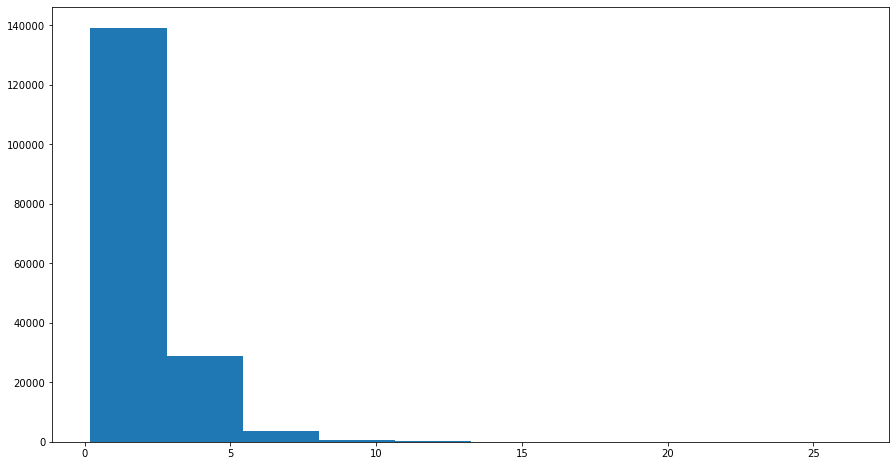

In [56]:
# Create histogram for distances
plt.figure(figsize=(15,8))
plt.hist(filtered_df["distance_km"])

### Some Interesting Data Cleaning: Ranking
Let's now create a new column, data point, called rank. This data point will represent the frequency of a start or end station being the destination across all observations. So, a higher rank for a start station indicates more people start at that station then others, while low rank means less people begin at that station. The same applies for the end station. This rank system is an example of modifying our data to be a data point that is usable. We can't really pass in string values, such as the station names, into the machine learning model. Therefore, transforming it into an integer value, such as rank, can help make it useful.

In [57]:
# Rank start stations based on occurrences
start_station_rank = filtered_df['start_station_name'].value_counts().rank(ascending=False, method='min')

# Rank stop stations based on occurrences
end_station_rank = filtered_df['end_station_name'].value_counts().rank(ascending=False, method='min')

# Assign ranks to start and stop stations
filtered_df['start_station_rank'] = filtered_df['start_station_name'].map(start_station_rank)
filtered_df['end_station_rank'] = filtered_df['end_station_name'].map(end_station_rank)

In [58]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,51.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,48.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,355.0,336.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,45.0,67.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,62.0,76.0


In [59]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,51.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,48.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,355.0,336.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,45.0,67.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,62.0,76.0


After creating new columns for data points, based off of some the existing data, we can drop the columns which cannot really be used for our machine learning model.

In [60]:
# Drop the start and end station columns
filtered_df.drop(["start_station_name", "end_station_name"], axis=1, inplace=True)

In [61]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,51.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,48.0,49.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,355.0,336.0
3,2024-02-03 21:26:00,2024-02-04 00:21:00,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,45.0,67.0
4,2024-02-16 15:38:00,2024-02-16 18:12:00,38.900880,-77.048911,38.901755,-77.051084,154.0,0,0,0.211721,0.082489,62.0,76.0


In [62]:
# Drop time columns as we already have the calculated time duration column
filtered_df.drop(["started_at", "ended_at"], axis = 1, inplace=True)

# Drop the longitude and latitude measurements since we have our calculated distance column
filtered_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis = 1, inplace=True)

# Print out top of table to check
filtered_df.head()

,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,286.0,1,0,0.209854,0.044025,6.0,51.0
1,298.0,0,0,0.282017,0.056782,48.0,49.0
2,269.0,0,0,0.314635,0.070179,355.0,336.0
3,175.0,1,0,0.214356,0.073494,45.0,67.0
4,154.0,0,0,0.211721,0.082489,62.0,76.0


## Part 3: Model training and testing
Finally, we've reached the fun part of the tutorial, the part where we actually do the interesting stuff: model training and testing. Now, there are so many different machine learning models, how do we decide which one to use?

First, we need to decide if our problem is a regression or classfication problem. In our case, it is a classification problem, since we are trying to predict whether the bike used was electric or regular. Based off of your problem, there are different algorithms you can use. In order to decide from here, you need to understand the algorithms, as each one has its advantages and disadvantages. But, this process may just be trial and error, testing a number of different machine learning algorithms. 

To truely understand each algorithm would be overwhelming for this tutorial, however, we will provide external links for if you want to learn more. What's important is that you get a basic understanding of each algorithm that we use in this tutorial, as well as, how we are analyzing or scoring its performance for predicting the metric we want. Feel free to play around and experiment with some of the code provided.

The goal of model training and testing is to create a model, which can accurately predict the outcome.

<center><img src="https://imgs.xkcd.com/comics/machine_learning.png"></center>

### Splitting into Training and Testing Set
First, we need to divide our data into training and testing. We will need to define our dependent variable, or the variable that we are predicting, which is type of bike. Then, we will split our dataset accordingly. A common ratio for splitting is 70% training and 30% testing, but it is often determined by a variety of factors, such a model complexity, size of dataset, and also the algorithm to be used on it. In our case, let's divide our training and testing by 80% and 20% respectively.

In [63]:
from sklearn.model_selection import train_test_split

# drop average speed here becuase it was included for data analysis and identifying bad sensor data. Can't use
# a variable that was created based on the dependent variable as an independent variable
X = filtered_df.drop(["rideable_type_electric_bike", "average_speed"], axis=1)
y = filtered_df['rideable_type_electric_bike']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard Scaler
Next, let's standardize and scale our data. Standard scaling ensures all features are on a similar scale by transforming them to have a mean of 0 and a standard deviation of 1. This prevents features with larger values from dominating the hypothesis function during the training process. Standard scaling allows all features to contribute equally, but it does not necessarily mean each feature will be weighted the same in the final model. The learned weights can still vary based on the patterns in the data.?

In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# create a RandomForest Classifier
rf = RandomForestClassifier()

In [86]:
# fit the random forest classifier with the training data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [69]:
# create predictions on the test data
predictions = rf.predict(X_test_scaled)

### Classification Report and Confusion Matrix
#### Evaluating Model Performance

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     16962
           1       0.79      0.72      0.75     17524

    accuracy                           0.76     34486
   macro avg       0.76      0.76      0.76     34486
weighted avg       0.76      0.76      0.76     34486



In [72]:
print(confusion_matrix(y_test, predictions))

[[13635  3327]
 [ 4916 12608]]


### Grid Search CV w/ Random Forest
#### Try and Improve the Model Accuracy from 76%

In [74]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 2, 8],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid and RandomForestClassifier
# Uses rf model, tries different parmas in param_grid, uses 5 fold cross validation, all the cpu power
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best score:", grid_search.best_score_)

# get the predictions
predictions = grid_search.predict(X_test)

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warn

Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.7478940209547513


## Need to yap about how the Grid Search parameter tuning didn't help much so that means the data would be an indicator of something needs works/ more features rather than just params adjusting. Some of this could also be added to the conclusion part!!!!!!!!!!!!!

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
# creating a logistic regression model
lr = LogisticRegression()

In [107]:
# fitting the model on training data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [108]:
# predictions
y_pred = lr.predict(X_test_scaled)

##### Looking at the metrics

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     16962
           1       0.68      0.63      0.65     17524

    accuracy                           0.66     34486
   macro avg       0.66      0.66      0.66     34486
weighted avg       0.67      0.66      0.66     34486



In [110]:
print(confusion_matrix(y_test, predictions))

[[ 2142 14820]
 [ 2632 14892]]


In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
# MinMax Scaler is better for ANN scales values between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

2024-05-17 12:05:08.313481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Sequential Model (Artificial Neural Network) -- Fully Connected Layers

In [114]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.1))
# output layer is sigmoid because it is a binary problem
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model (binary_crossentropy loss for binary classification)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [115]:
# printing model summary and layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Early Stopping
Here we are optimizing our model above.

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
# implementing early stopping prevents overfitting by monitoring that the loss doesn't increase for 10
# continuous epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose = 1)

In [118]:
# Fitting model
# Default run is using 800 epochs, and validation_data is used with early_stop to monitor test loss
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

Epoch 1/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6783 - val_loss: 0.6128
Epoch 2/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6044 - val_loss: 0.5827
Epoch 3/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5910 - val_loss: 0.5676
Epoch 4/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5857 - val_loss: 0.5672
Epoch 5/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5862 - val_loss: 0.5674
Epoch 6/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5835 - val_loss: 0.5743
Epoch 7/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5843 - val_loss: 0.5759
Epoch 8/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5813 - val_loss: 0.5641
Epoch 9/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5811 - val_loss: 0.5694
Epoch 10/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5806 - val_loss: 0.5731
Epoch 11/800
4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5825 - val_loss: 0.5746
Epoch 12/800
4311/4

<AxesSubplot:>

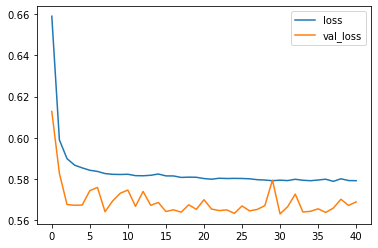

In [119]:
# plot the loss of training and test
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [120]:
# calculate the predictions
prediction = model.predict(X_test)

1078/1078 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step


#### Looking at the metrics

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      0.13      0.20     16962
           1       0.50      0.85      0.63     17524

    accuracy                           0.49     34486
   macro avg       0.47      0.49      0.41     34486
weighted avg       0.48      0.49      0.42     34486



In [122]:
print(confusion_matrix(y_test, predictions))

[[ 2142 14820]
 [ 2632 14892]]


### References
Here are some links to learn more about some of the algorithms above:
- __[Learn more about Different Algorithms](https://ml-cheatsheet.readthedocs.io/en/latest/)__
- __[Learn more about Random Forest](https://ml-cheatsheet.readthedocs.io/en/latest/classification_algos.html#random-forests/)__
- __[Learn more about Logistic Regression](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)__
- __[Learn more about Neural Networks](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)__
- __[Learn more about Distance Formulas](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)__

## Part 4: Interpretation of Results
As a data scientist, it is important to interpret your results, in order to communicate the significance or maybe insignificance of what you found. Regardless, you will need to report and share with your team, making the numbers make sense. For a more specific case, we would need to interpret the results in terms of the problem or question at hand. So, for this tutorial, our original question was Why and When do people in Washington D.C use electric bikes over normal bikes? *How can we use the results we found to help answer this question?*

It's important to understand that sometimes, our results don't provide a clear answer. But, it will always provide us some guidance or insight into our question/answer.

From our results...**SOMETHING SOMETHING SOMETHING**

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Top-6-data-collection-methods-700x545.png"></center>

## Conclusion
We hope you have learned a lot from this tutorial, including the individual steps of the data science lifecycle:

1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

Beginning to understand the lifecycle is the beginning to learning more. As a data scientist, you aren't just processing and spitting out data. You are solving real world problems. Data science is used in politics, advertising, sports, scientific studies, and so much more. We hope that through this tutorial, we have inspired you to learn more. So, go on and make a difference!

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Data-collection-and-lead-generation-700x545.png"></center>